In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# llegim els datasets 
df_ai = pd.read_csv('ai_news_dataset.csv', delimiter=',', encoding='utf-8', low_memory=False)
df_dana = pd.read_csv('dana_news_dataset.csv', delimiter=',', encoding='utf-8', low_memory=False)
df_elections = pd.read_csv('elections_news_dataset.csv', delimiter=',', encoding='utf-8', low_memory=False)

In [3]:
file_path = "..//final_dataset_v1.csv"
df = pd.read_csv(file_path, delimiter=',', encoding='utf-8', low_memory=False)

In [4]:
# llegim els fitxers amb la informació extreta amb OpenAI
ai_complete = pd.read_csv('ai_complete.csv', delimiter=',', encoding='utf-8', low_memory=False)
dana_complete = pd.read_csv('dana_complete.csv', delimiter=',', encoding='utf-8', low_memory=False)
elections_complete = pd.read_csv('elections_complete.csv', delimiter=',', encoding='utf-8', low_memory=False)

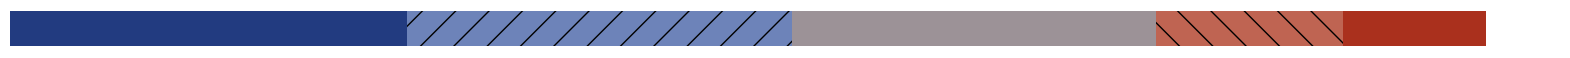

In [34]:
# càlcul dels percentatges
counts = elections_complete['category'].value_counts()
percentages = counts / counts.sum() * 100

plt.figure(figsize=(20, 0.5))  

colors = ['#223b80', '#6d83b9', '#9c9297', '#bf6452', '#aa301d']

bar_height = 0.2  

patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

left = 0  
for i, category in enumerate(percentages.index):
    hatch_pattern = None  
    if colors[i] == '#6d83b9':
        hatch_pattern = patterns[0]  
    elif colors[i] == '#bf6452':
        hatch_pattern = patterns[1] 

    plt.barh(0, percentages[category], left=left, height=bar_height, 
             color=colors[i], label=category, hatch=hatch_pattern)
    left += percentages[category]

ax = plt.gca()  
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)  
ax.spines['bottom'].set_visible(False) 
ax.spines['left'].set_visible(False) 

plt.yticks([])  
plt.xticks([])  

plt.show()

In [68]:
# Exemple de raonament del model
new_republican = elections_complete[elections_complete["lean"]>3].sample()
new_democrat = elections_complete[elections_complete["lean"]<-4].sample()

In [54]:
print(new_democrat['entradeta'].iloc[0])

The Boss fa públic el seu suport a la candidata demòcrata i se suma a grans noms com els de la cantant Taylor Swift o l'actriu Meryl Streep


In [56]:
print(new_democrat.reason.iloc[0])

L'article mostra un clar suport al Partit Demòcrata, ja que destaca el suport de figures culturals influents, com Bruce Springsteen, Taylor Swift i Jennifer Lopez, cap a la candidatura de Kamala Harris i Tim Walz per a les eleccions presidencials dels Estats Units. A més, l'article critica Donald Trump, el candidat republicà, qualificant-lo de "perillós" i desqualificant-lo per al càrrec de president a causa del seu menyspreu per la Constitució i la transferència pacífica del poder. Aquestes crítiques serveixen per enfortir el suport a Harris i Walz i reflecteixen una tendència cap als valors i principis del Partit Demòcrata.


In [78]:
print(new_republican['lean'].iloc[0])
print(new_republican.reason.iloc[0])

4
L'article mostra un clar suport envers el Partit Republicà i Donald Trump, ja que descriu l'atac fallit contra Trump no només com un esdeveniment rellevant sinó també com un element que ha commogut els partidaris republicans. A més, la descripció dels assistents a la convenció republicana a Milwaukee, que exhibeixen el seu suport a Trump amb orelles embenades, i l'elogi dels rivals en les primàries transmeten una imatge de cohesió i suport cap a l'expresident. També destaca com els serveis secrets van detectar l'atacant abans de l'atac, deixant entreveure una crítica sobre la gestió, però reforçant la seguretat al voltant de Trump.


In [79]:
new_neutral = elections_complete[elections_complete["lean"]==0].sample()


In [85]:
print(new_neutral['entradeta'].iloc[0])
print(new_neutral.reason.iloc[0])

Els Estats Units decideixen qui els governarà en unes eleccions que molts mitjans presenten com les més ajustades de la història
L'article ofereix una visió equilibrada dels avantatges i desafiaments que afronten tant els candidats Donald Trump dels republicans com Kamala Harris dels demòcrates. Esmenta factors que podrien afavorir Trump, com la percepció de lideratge fort i la preocupació per la immigració, així com aspectes a favor de Harris, com la seva joventut relativa i el suport de figures de l'estrella de la música i Hollywood. Això demostra que l'article intenta proporcionar una cobertura equilibrada dels dos candidats sense mostrar una clara inclinació cap a cap dels dos partits polítics.


In [92]:
## Anem a veure el to de les notícies sobre la dana
week_ranges = [
    ("2024-10-21", "2024-10-27"),
    ("2024-10-28", "2024-11-03"),
    ("2024-11-04", "2024-11-10"),
    ("2024-11-11", "2024-11-17"),
    ("2024-11-18", "2024-11-24"),
    ("2024-11-25", "2024-12-01")
]

dana_complete['data'] = pd.to_datetime(dana_complete['data'])


# Create a function to assign the week group
def get_week_group(date):
    for start, end in week_ranges:
        if start <= date.strftime('%Y-%m-%d') <= end:
            return f"{start} to {end}"
        
dana_complete['week_group'] = dana_complete['data'].apply(get_week_group)



In [112]:
import pandas as pd

# Define the bins and labels to match your desired categories
bins = [-6, -4, -2, 1, 3, 5]
labels = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']

# Create a new column 'tone_category' using pd.cut() to categorize the 'tone' values
dana_complete['tone_category'] = pd.cut(dana_complete['tone'], bins=bins, labels=labels, right=True)

# Display the result
print(dana_complete[['tone', 'tone_category']])



     tone  tone_category
0      -2       Negative
1      -4  Very Negative
2      -3       Negative
3       0        Neutral
4      -3       Negative
..    ...            ...
342     4  Very Positive
343    -4  Very Negative
344    -4  Very Negative
345    -4  Very Negative
346     4  Very Positive

[347 rows x 2 columns]


In [14]:
#select tone == 5 in dana complete
dana_complete[dana_complete['tone'] == 5]

,id,entradeta_id,cos,redactor,imatges,data,entradeta,permatitle,avantitol,tematiques,tags,titol,titol_portada,comarques,reason,tone
173,3320230,Les recaptacions es destinaran íntegrament als...,Més de 200 artistes participen en la iniciativ...,Redacció,[{'text': 'https://img.3cat.cat/multimedia/jpg...,2024-11-06,Les recaptacions es destinaran íntegrament als...,Més de 200 artistes faran concerts a Catalunya...,NaN,"[{'id': 'PUACT_CULTUR', 'desc': 'Cultura (Actu...","[{'id': 'PAISVALENCIA', 'desc': 'País Valencià...",Més de 200 artistes faran concerts a Catalunya...,NaN,NaN,L'article té un to positiu ja que parla d'una ...,5
298,3322668,NaN,ACN Barcelona - El concert benèfic 'Barcelona ...,NaN,NaN,2024-11-19,NaN,El concert benèfic 'Barcelona amb València' ve...,NaN,NaN,NaN,El concert benèfic 'Barcelona amb València' ve...,NaN,"[{'id': 'PUCOM_BARCEL', 'desc': 'Barcelonès', ...","L'article té un to positiu, ja que descriu el ...",5


In [113]:
dana_complete.columns

Index(['id', 'entradeta_id', 'cos', 'redactor', 'imatges', 'data', 'entradeta',
       'permatitle', 'avantitol', 'tematiques', 'tags', 'titol',
       'titol_portada', 'comarques', 'reason', 'tone', 'week_group',
       'lean_category', 'tone_category'],
      dtype='object')

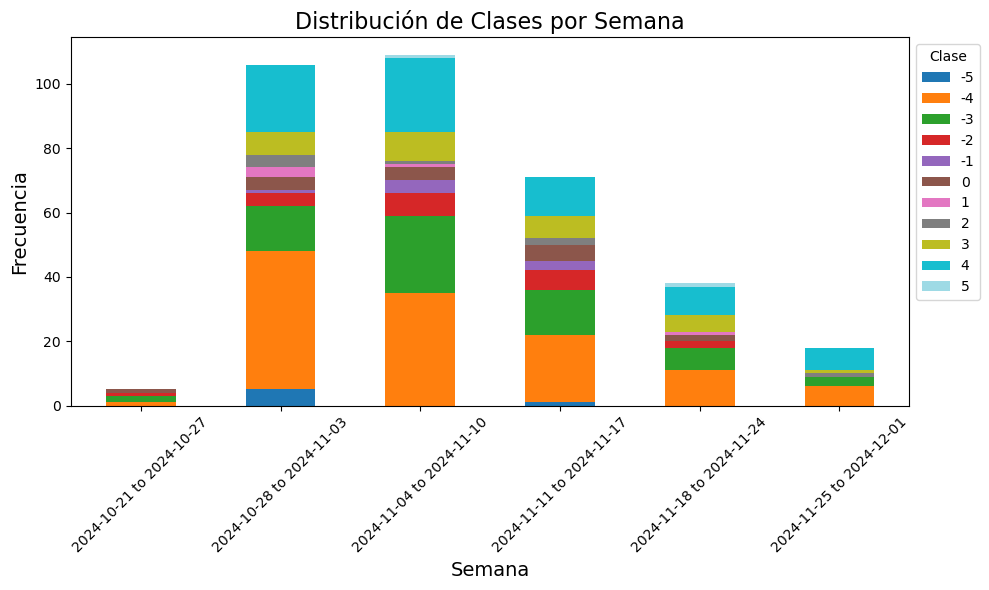

In [95]:
# Contar las ocurrencias de cada clase por semana
counts = pd.crosstab(dana_complete['week_group'], dana_complete['tone'])

# Graficar el histograma apilado
counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Añadir etiquetas y título
plt.title('Distribución de Clases por Semana', fontsize=16)
plt.xlabel('Semana', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Clase', bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

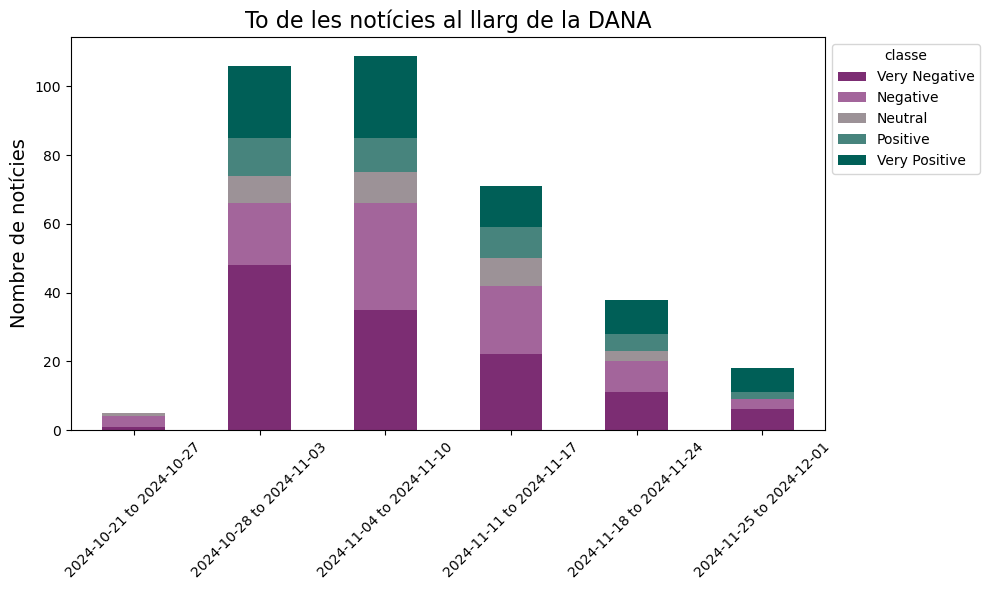

In [114]:
# Assuming 'dana_complete' is your DataFrame with 'week_group' and 'tone_category' columns
# Example: counts is a crosstab of your data
counts = pd.crosstab(dana_complete['week_group'], dana_complete['tone_category'])

# Define a custom color palette
custom_colors = ['#7c2d73', '#a3659b', '#9c9297', '#47847d', '#005f57']  # Customize these color codes

# Graficar el histograma apilado con colores personalizados
counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Añadir etiquetas y título
plt.title('To de les notícies al llarg de la DANA', fontsize=16)
plt.ylabel('Nombre de notícies', fontsize=14)
plt.xlabel('', fontsize=14)
plt.xticks(rotation=45)

# Añadir leyenda
plt.legend(title='classe', bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [137]:
negative_new = dana_complete[(dana_complete['week_group'] == '2024-10-28 to 2024-11-03') & (dana_complete['tone'] == -5)]

In [136]:
print(negative_new['entradeta'].iloc[0])
print(negative_new.reason.iloc[0])

nan
L'article té un to positiu, ja que se centra en la solidaritat i la iniciativa de la ciutadania gironina en ajudar les persones afectades per la catàstrofe provocada per la Dana a València. S'estressen accions comunitàries com la recollida de provisions i la voluntat de diferents punts de Girona de col·laborar, destacant l'onada de solidaritat i l'èxit de la iniciativa. A més, s'explica el propòsit de contribuir a pal·liar la falta d'ajuda oficial, reforçant el valor de l'acció ciutadana.


In [176]:
positive_new = dana_complete[(dana_complete['week_group'] == '2024-10-28 to 2024-11-03') & (dana_complete['tone'] == 4)].sample()

In [177]:
print(positive_new['entradeta'].iloc[0])
print(positive_new.reason.iloc[0])

El Ministeri de Treball diu que s'encarregarà que cap treballador pateixi represàlies ni es vegi perjudicat, segons la ministra Yolanda Díaz
L'article té un to positiu ja que informa sobre diverses mesures de suport i protecció per als treballadors i empreses afectades per la DANA. Es destaca el suport del Ministeri de Treball i Economia Social per garantir que els treballadors no pateixin represàlies i puguin acollir-se a permisos retribuïts. A més, es mencionen mesures de teletreball i préstec d'equipaments per assegurar que tothom pugui continuar treballant sense riscos. També, s'indica que les empreses poden sol·licitar ERTOs per a situacions catastròfiques, oferint una solució temporal i protecció per desocupació.


In [5]:
## Anem a veure com han evolucionat el nombre de notícies sobre la inteligència artificial
ai_complete['data'] = pd.to_datetime(ai_complete['data'])

In [11]:
# We drop the rows which have same colum "permatittle"
ai_complete = ai_complete.drop_duplicates(subset='permatitle')

In [10]:
# Extract year-month and group
ai_complete['month'] = ai_complete['data'].dt.to_period('M')  # Creates a Year-Month column
grouped = ai_complete.groupby('month').size()  # Count of rows per month

# Display results
print(grouped)

month
2021-01     2
2021-02     2
2021-03     1
2021-04     4
2021-05     5
2021-06     2
2021-07     2
2021-09     5
2021-10     4
2021-11     1
2021-12     1
2022-01     4
2022-02     5
2022-03     5
2022-04     1
2022-05     3
2022-06     4
2022-07     2
2022-08     1
2022-09     3
2022-10     8
2022-11     5
2022-12     8
2023-01    10
2023-02    10
2023-03    15
2023-04    19
2023-05    22
2023-06    14
2023-07    11
2023-08     4
2023-09    15
2023-10    20
2023-11    15
2023-12     9
2024-01    10
2024-02    12
2024-03    11
2024-04     8
2024-05    15
2024-06    12
2024-07    10
2024-08     4
2024-09     5
2024-10     8
2024-11     4
Freq: M, dtype: int64


In [13]:
print(ai_complete[ai_complete['month'] == '2023-10'])

          data                                          entradeta  \
203 2023-10-02                                                NaN   
205 2023-10-03  La incertesa que envolta el futur de la intel·...   
206 2023-10-04                                                NaN   
208 2023-10-05                                                NaN   
209 2023-10-06  Famosos sexualitzats o nens soldat són algunes...   
210 2023-10-07  Les empreses catalanes comencen a aplicar eine...   
211 2023-10-10                                                NaN   
212 2023-10-11  Hem obert l'agenda de Toni Puntí, cap de la se...   
213 2023-10-11  En uns anys, aquesta tecnologia podria agilitz...   
214 2023-10-13                                                NaN   
215 2023-10-17  Aquests acomiadaments se sumen als dels 700 tr...   
216 2023-10-19  A banda del tractament, també s'ha avançat en ...   
217 2023-10-19                                                NaN   
219 2023-10-19                    

In [7]:
len(ai_complete)

341

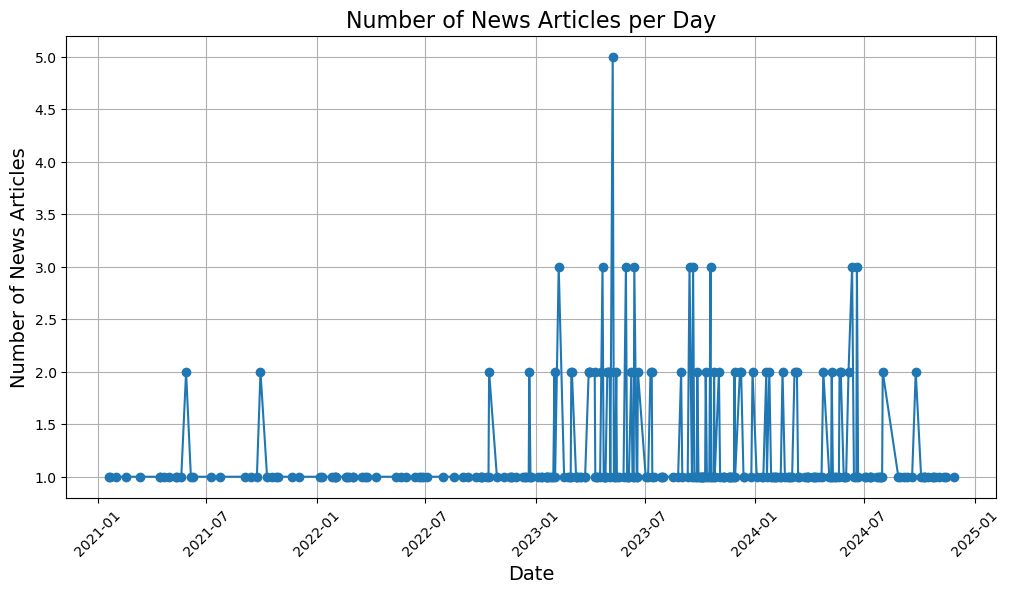

In [8]:
# Ensure the 'data' column is in datetime format
# Count the number of rows per day
daily_counts = ai_complete.groupby('data').size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')

# Formatting
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of News Articles', fontsize=14)
plt.title('Number of News Articles per Day', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

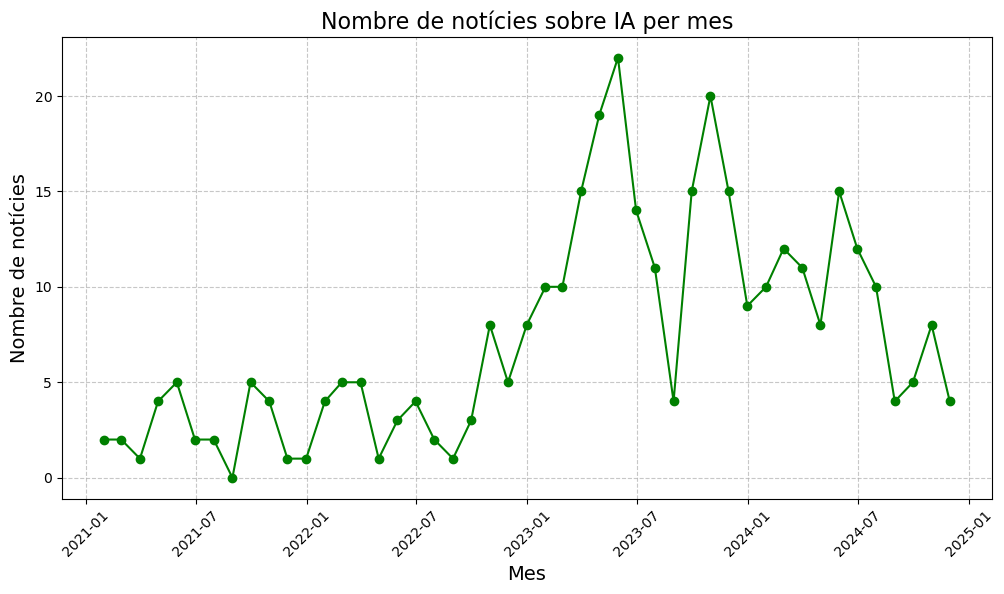

In [12]:
# Group by months
monthly_counts = ai_complete.resample('M', on='data').size()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='green')

# Formatting
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Nombre de notícies', fontsize=14)
plt.title('Nombre de notícies sobre IA per mes', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()